In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np
import os

from AStar_maze_solver import MazeSolver, manhattan, euclidean, squared_euclidean, infinity_norm_distance

heuristics = [manhattan, euclidean, infinity_norm_distance, squared_euclidean]

os.makedirs("easy_maze", exist_ok=True)
os.makedirs("hard_maze", exist_ok=True)


## EasyMaze

heuristic: manhattan
num expanded nodes: 37524
solution's path length: 4021
time [seconds]: 0.7618465423583984
nodes expanded / num of total nodes [%]: 0.623798916115304

heuristic: euclidean
num expanded nodes: 39074
solution's path length: 4021
time [seconds]: 0.6959497928619385
nodes expanded / num of total nodes [%]: 0.6495661136416531

heuristic: infinity_norm_distance
num expanded nodes: 39362
solution's path length: 4021
time [seconds]: 0.6026897430419922
nodes expanded / num of total nodes [%]: 0.6543538251820328

heuristic: squared_euclidean
num expanded nodes: 28430
solution's path length: 4077
time [seconds]: 1.431821584701538
nodes expanded / num of total nodes [%]: 0.47262027462845363



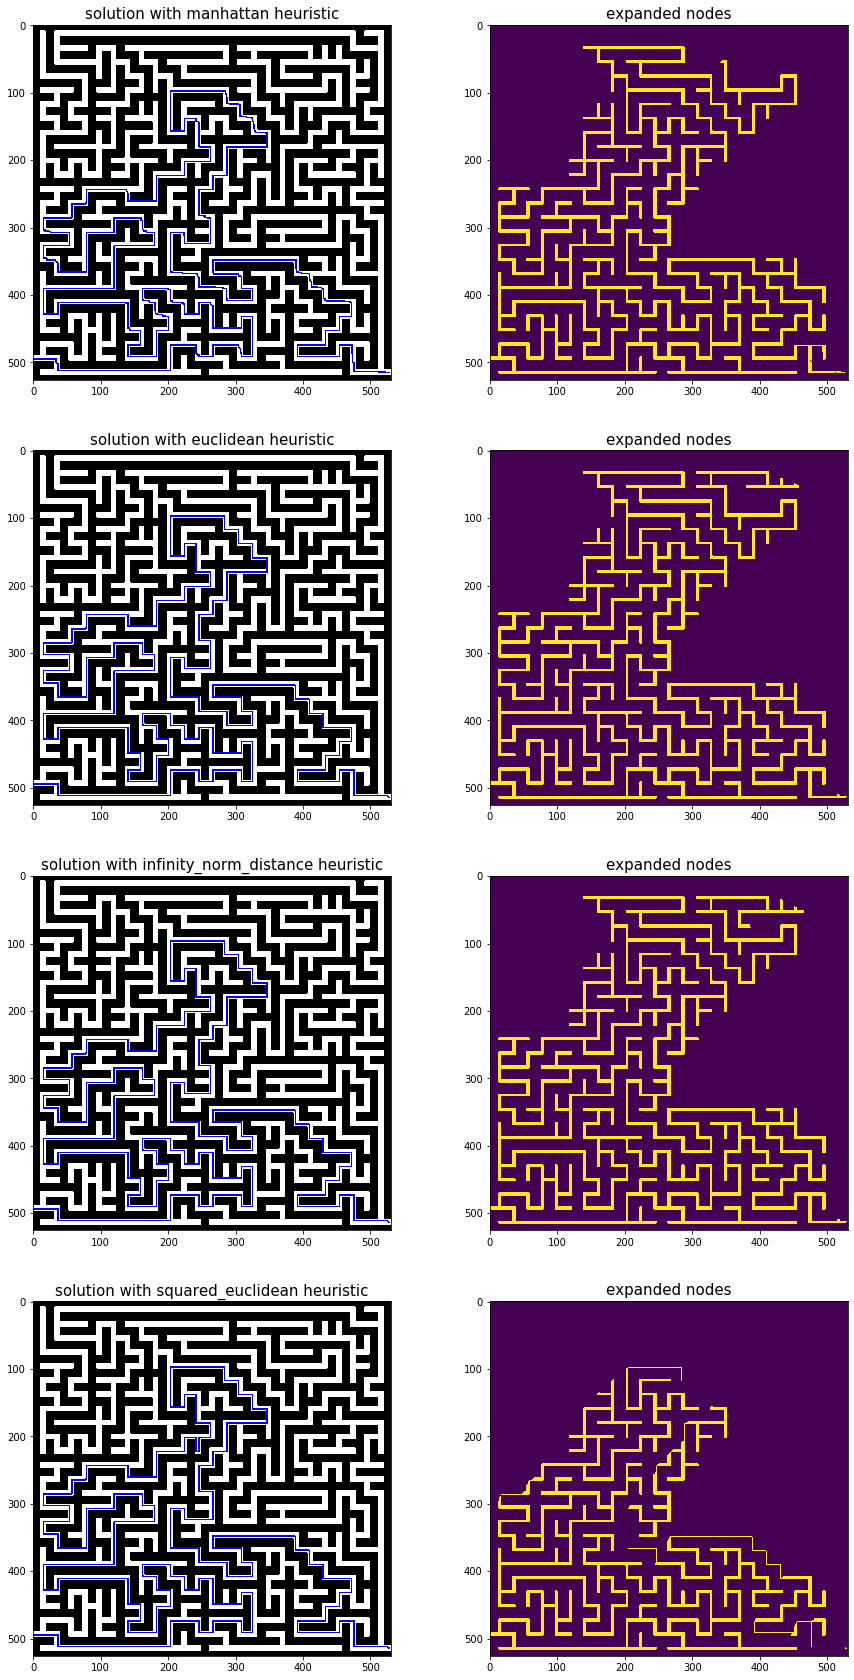

In [2]:
maze_easy = cv2.imread("maze1.png", 0)
_, maze_easy = cv2.threshold(maze_easy, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
maze_easy = maze_easy[33:-60, 83:-83]
start_point = (495, 0)
goal_point = (515, 528)
kernel = np.ones((7, 7),np.uint8)
maze_easy = cv2.erode(maze_easy, kernel, iterations = 1)

plt.figure(figsize=(15, 30))
for h, heuristic in enumerate(heuristics):
    M = MazeSolver(maze_easy, goal_point)

    (positions, closedset, closed), time = M.solve(start_point, manhattan, heuristic)
    
    expanded_percentage = len(closed) / np.sum(maze_easy==255)
    
    print("heuristic:", heuristic.__name__)
    print("num expanded nodes:", len(closedset))
    print("solution's path length:", len(positions)) 
    print("time [seconds]:", time)
    print("nodes expanded / num of total nodes [%]:", expanded_percentage)
    print()
    solved_maze = M.draw_path(positions)

    plt.subplot(4, 2, h*2 + 1)
    plt.imshow(solved_maze);
    plt.title(f"solution with {heuristic.__name__} heuristic", fontsize=15)
    plt.subplot(4, 2, (h+1) * 2)
    mask = np.zeros_like(maze_easy)
    for pt in closedset:
        mask[pt[0], pt[1]] = 255
    plt.imshow(mask);
    
    M.create_search_annimation(closed, name=f"./easy_maze/{heuristic.__name__}")
    plt.title("expanded nodes", fontsize=15)
    
plt.savefig("easy_maze.png")

# Hard Maze

heuristic: manhattan
num expanded nodes: 323571
solution's path length: 3937
time [seconds]: 15.696594476699829
nodes expanded / num of total nodes [%]: 0.6578157178376335

heuristic: euclidean
num expanded nodes: 358757
solution's path length: 3937
time [seconds]: 18.902907371520996
nodes expanded / num of total nodes [%]: 0.7293484072561381

heuristic: infinity_norm_distance
num expanded nodes: 369670
solution's path length: 3937
time [seconds]: 18.968213081359863
nodes expanded / num of total nodes [%]: 0.7515343971277956

heuristic: squared_euclidean
num expanded nodes: 83616
solution's path length: 6353
time [seconds]: 25.509766340255737
nodes expanded / num of total nodes [%]: 0.16999026199106707



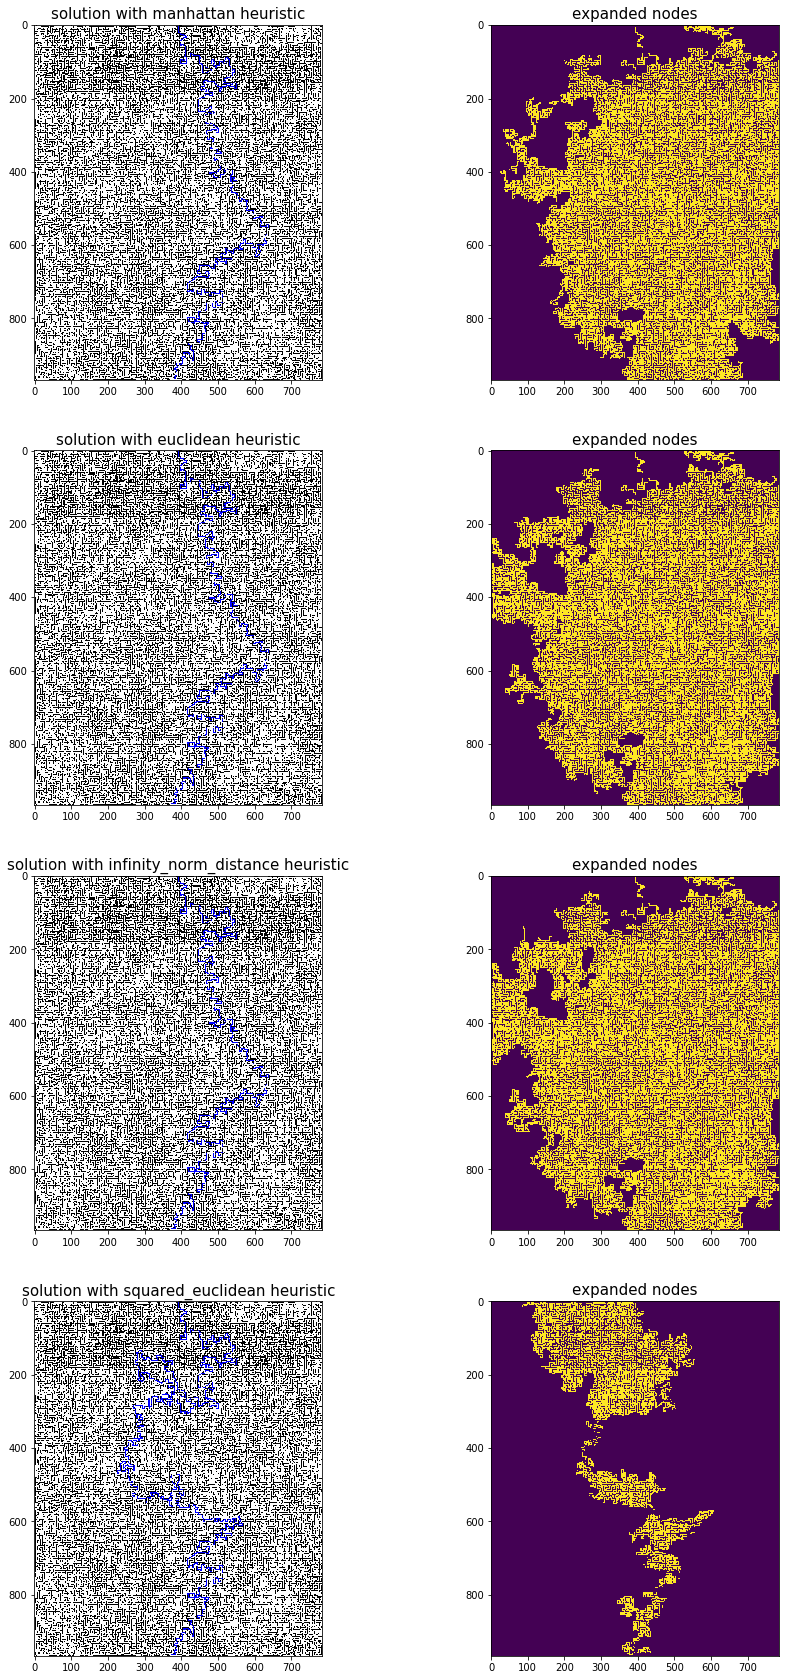

In [2]:
maze_hard = cv2.imread("maze2.jpg", 0)
_, maze_hard = cv2.threshold(maze_hard, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
maze_hard = maze_hard[20:-15, 5:-10]
maze_hard[:, 0] = 0
maze_hard[:, -1] = 0
maze_hard[-1, :] = 0

start_point = (964, 375)
goal_point = (4, 393)

plt.figure(figsize=(15, 30))

for h, heuristic in enumerate(heuristics):
    M = MazeSolver(maze_hard, goal_point)

    (positions, closedset, closed), time = M.solve(start_point, manhattan, heuristic)
    
    expanded_percentage = len(closed) / np.sum(maze_hard==255)
    
    print("heuristic:", heuristic.__name__)
    print("num expanded nodes:", len(closedset))
    print("solution's path length:", len(positions)) 
    print("time [seconds]:", time)
    print("nodes expanded / num of total nodes [%]:", expanded_percentage)
    print()
    solved_maze = M.draw_path(positions, dilate=False)

    plt.subplot(4, 2, h*2 + 1)
    plt.imshow(solved_maze);
    plt.title(f"solution with {heuristic.__name__} heuristic", fontsize=15)
    plt.subplot(4, 2, (h+1) * 2)
    mask = np.zeros_like(maze_hard)
    for pt in closedset:
        mask[pt[0], pt[1]] = 255
    plt.imshow(mask);
    
    M.create_search_annimation(closed, name=f"./hard_maze/{heuristic.__name__}")
    plt.title("expanded nodes", fontsize=15)
    
plt.savefig("hard_maze.png")